In [1]:
state = 'WV' 
year = 2010
objective_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 3 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))
from WV_plans_2010 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 1575 plans from file.


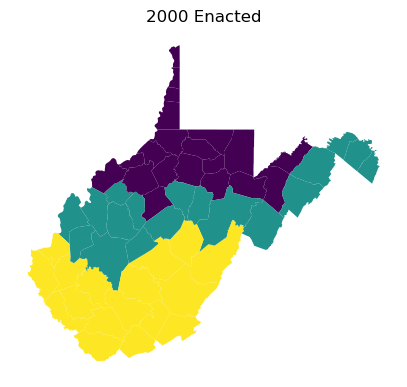

In [6]:
#County-level districts for enacted map in 2000 
similarity_initial_districts = [[0, 2, 3, 4, 5, 10, 11, 13, 16, 17, 20, 24, 26, 31, 32, 33, 35, 45, 48, 49], [6, 14, 18, 21, 22, 23, 27, 28, 29, 30, 37, 39, 41, 44, 47, 50, 51, 52], [1, 7, 8, 9, 12, 15, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]]
similarity_threshold = 0.90 * (615991+620862+616141) # how many people stayed in same district from 2000 to 2010 cycle?
from draw import draw_plan
draw_plan(filepath, filename2, G, similarity_initial_districts, title='2000 Enacted',year=2010)

In [7]:
from epsilon_constraint import epsilon_constraint_method
from pareto import filter_and_sort_pareto
from metrics import scores

plans_dict = {}
for obj_type in objective_types:
    
    print(f"\n{'#' * 100}")
    print(f"Applying epsilon-constraint method for {state} with compactness objective {obj_type}")
    print(f"{'#' * 100}\n")
    
    plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
    _,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
    print(f"Passing {len(nondominated_warm_starts_plans)} nondominated warm start plans")
    
    (new_plans, obj_bounds, deviations) = epsilon_constraint_method(
                G,                 
                obj_type,          
                contiguity ='lcut',                                          # {'lcut', 'scf', 'shir'} 
                cutoff=None,       
                verbose=True,
                warm_start_mode='none',                                        # {'None', 'user', 'refinement'}
                warm_starts=None,                                             # if you have user define warm starts else it is None
                starting_deviation=starting_deviation, 
                time_limit=3600, 
                sizes=None,      
                max_B=False,                                                 # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
                symmetry_breaking= None,                                    # {None, 'orbitope', 'rsum'} 
                state=state,
                year=year, 
                similarity = [similarity_initial_districts,similarity_threshold]
            )
    plans_dict[(state, obj_type)] = list(zip(new_plans, obj_bounds, deviations))
    warm_starts += new_plans


####################################################################################################
Applying epsilon-constraint method for WV with compactness objective cut_edges
####################################################################################################

Passing 12 nondominated warm start plans
Initially, L = 611489 and U = 623841 and k = 3.

****************************************
Trying deviation = 6176.6466666666665
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 611489 and U = 623841 and k = 3
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
sizes =  [1, 1, 1]
Set parameter LazyConstraints to value 1
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 12.0

Final county-level districts for Enacted Plan is:
[[6, 14, 21, 22, 23, 27, 28, 29, 30, 37, 39, 41, 44, 47, 50, 51, 52], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54], [0, 2, 3, 4, 5, 10, 11, 13, 16, 17, 20, 24, 26, 31, 32, 33, 35, 45, 48, 49]]
Deviation for 'Enacted Plan': 3197.333333333372
Objective values for 'Enacted Plan': {'cut_edges': 34, 'perimeter': 42.1245, 'inverse_Polsby_Popper': 7.7477, 'average_Polsby_Popper': 0.138, 'bottleneck_Polsby_Popper': 0.0953}


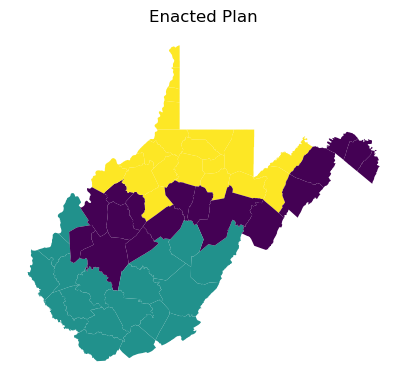

Final county-level districts for Facemire Plan is:
[[2, 4, 6, 11, 14, 16, 17, 20, 28, 29, 30, 31, 32, 41, 44, 48, 49, 50, 51], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54], [0, 3, 5, 10, 13, 21, 22, 23, 24, 26, 27, 33, 35, 37, 39, 45, 47, 52]]
Deviation for 'Facemire Plan': 1523.6666666666279
Objective values for 'Facemire Plan': {'cut_edges': 27, 'perimeter': 35.9639, 'inverse_Polsby_Popper': 5.4942, 'average_Polsby_Popper': 0.1822, 'bottleneck_Polsby_Popper': 0.1761}


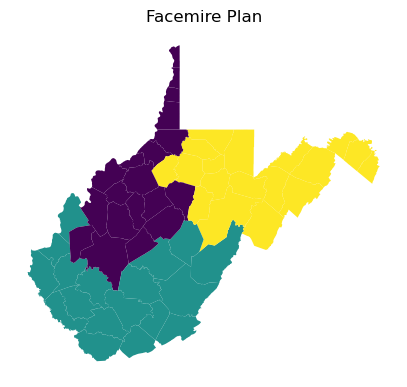

Final county-level districts for Cooper Plan 1 is:
[[0, 2, 4, 6, 11, 14, 16, 17, 18, 20, 25, 29, 30, 31, 32, 38, 41, 48, 49, 50], [3, 5, 7, 9, 10, 13, 21, 22, 23, 24, 26, 27, 33, 35, 37, 39, 42, 45, 46, 47, 51, 52, 54], [1, 8, 12, 15, 19, 28, 34, 36, 40, 43, 44, 53]]
Deviation for 'Cooper Plan 1': 323.66666666662786
Objective values for 'Cooper Plan 1': {'cut_edges': 34, 'perimeter': 40.5264, 'inverse_Polsby_Popper': 7.3143, 'average_Polsby_Popper': 0.1672, 'bottleneck_Polsby_Popper': 0.0958}


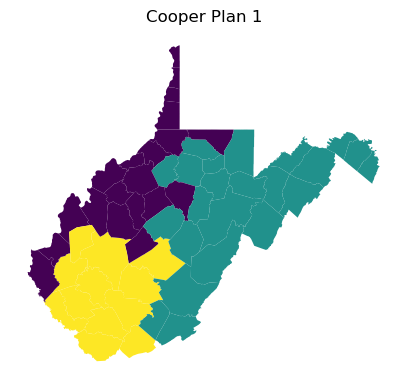

Final county-level districts for Cooper Plan 2 is:
[[5, 6, 7, 9, 10, 14, 18, 20, 25, 29, 30, 31, 35, 38, 41, 42, 46, 48, 50, 51, 52, 54], [1, 8, 12, 15, 19, 28, 34, 36, 40, 43, 44, 53], [0, 2, 3, 4, 11, 13, 16, 17, 21, 22, 23, 24, 26, 27, 32, 33, 37, 39, 45, 47, 49]]
Deviation for 'Cooper Plan 2': 232.66666666662786
Objective values for 'Cooper Plan 2': {'cut_edges': 36, 'perimeter': 43.359, 'inverse_Polsby_Popper': 8.1779, 'average_Polsby_Popper': 0.1572, 'bottleneck_Polsby_Popper': 0.089}


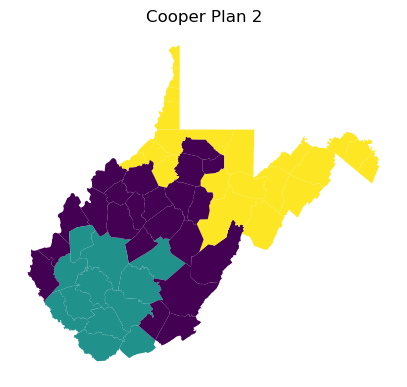

Final county-level districts for Cooper Plan 3 is:
[[5, 7, 9, 10, 12, 15, 19, 20, 29, 30, 34, 35, 36, 40, 42, 43, 46, 51, 52, 53, 54], [1, 6, 8, 14, 18, 25, 28, 31, 38, 41, 44, 48, 50], [0, 2, 3, 4, 11, 13, 16, 17, 21, 22, 23, 24, 26, 27, 32, 33, 37, 39, 45, 47, 49]]
Deviation for 'Cooper Plan 3': 115.66666666662786
Objective values for 'Cooper Plan 3': {'cut_edges': 35, 'perimeter': 40.65, 'inverse_Polsby_Popper': 7.2532, 'average_Polsby_Popper': 0.1605, 'bottleneck_Polsby_Popper': 0.089}


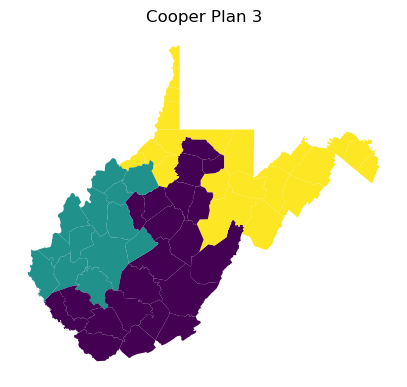

In [8]:
# Special plans
from metrics import county_level_districts, compute_obj, observed_deviation_persons
import math

special_plans = ['Enacted Plan','Facemire Plan','Cooper Plan 1','Cooper Plan 2','Cooper Plan 3']
special_plans_scores = {}
G_copy = G.copy()
G_copy._k = G._k
G_copy._ideal_population = G._ideal_population

for plan_name in special_plans:
            
    districts = county_level_districts(G_copy, plan_name, G_copy._k)
    print(f"Final county-level districts for {plan_name} is:")
    print(districts)
    
    deviation = observed_deviation_persons(G_copy, districts, G_copy._ideal_population)
    G_copy._L = math.ceil(G_copy._ideal_population - deviation)
    G_copy._U = math.floor(G_copy._ideal_population + deviation)
    
    scores = {obj: round(compute_obj(G_copy, districts, obj), 4) for obj in objective_types}
    special_plans_scores[plan_name] = [deviation, scores]
    
    print(f"Deviation for '{plan_name}': {deviation}")
    print(f"Objective values for '{plan_name}': {scores}")

    draw_plan(filepath, filename2, G_copy, districts, title=plan_name, year=year)

No feasible solution was found within the region: [0, 111.3]

####################################################################################################
Pareto Frontier for state WV,  objective cut_edges
####################################################################################################

Pareto front plans: [[[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 48, 49], [1, 3, 9, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 49], [9, 12, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 50, 51, 52], [1, 6, 7, 8, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 48, 53, 54]], [[0, 2, 3

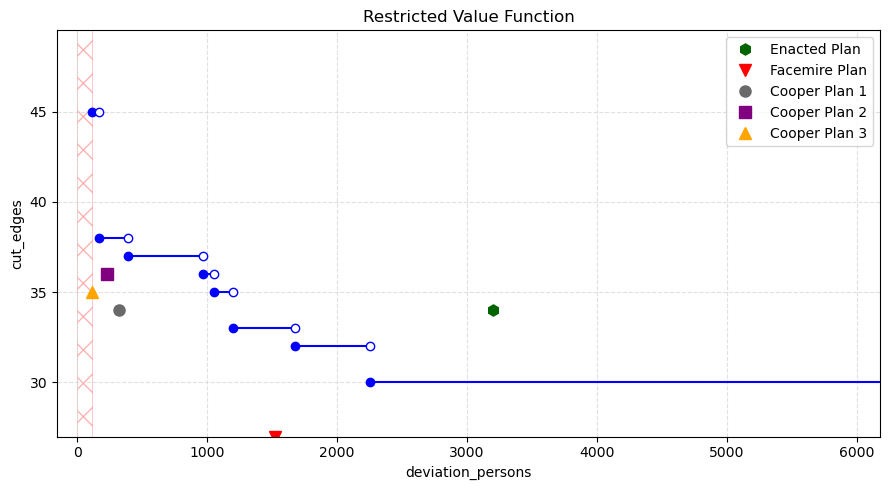

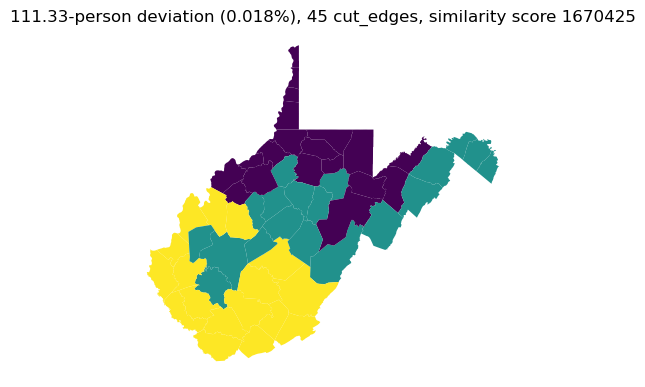

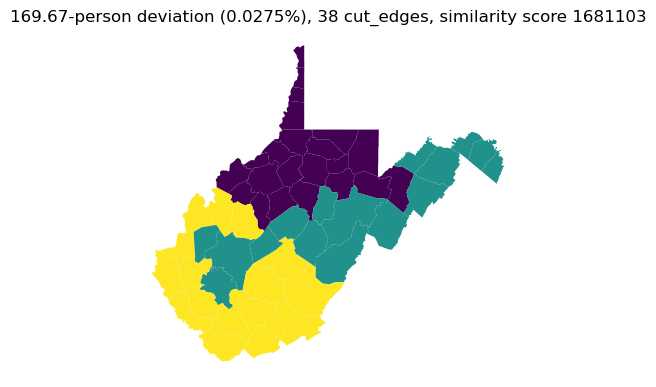

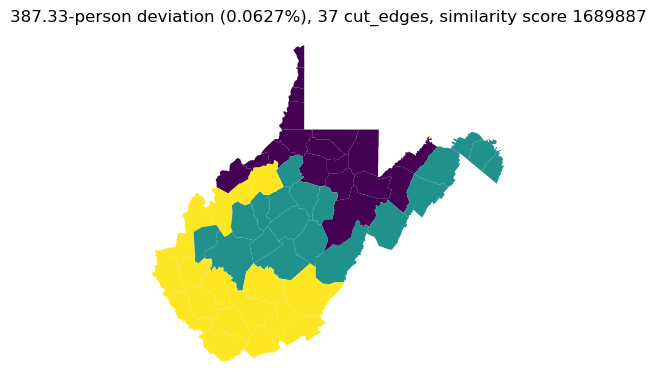

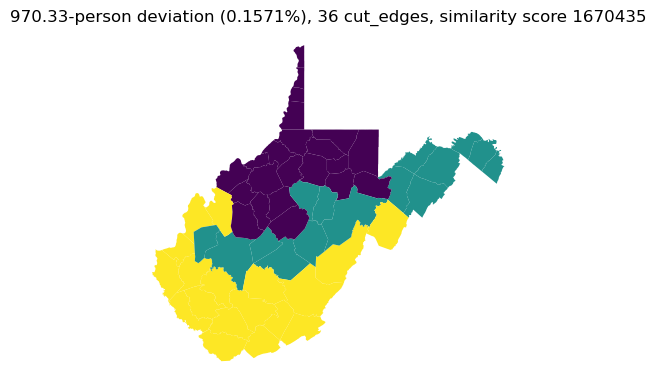

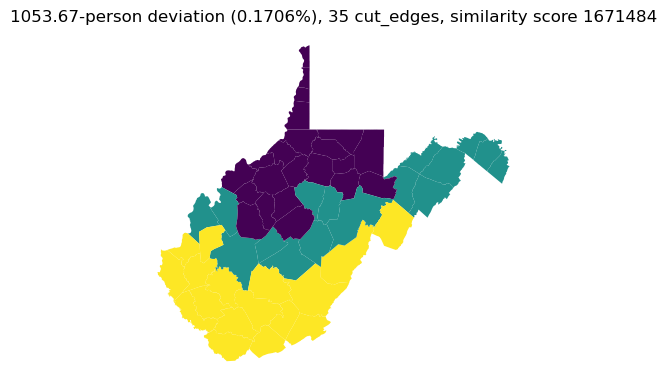

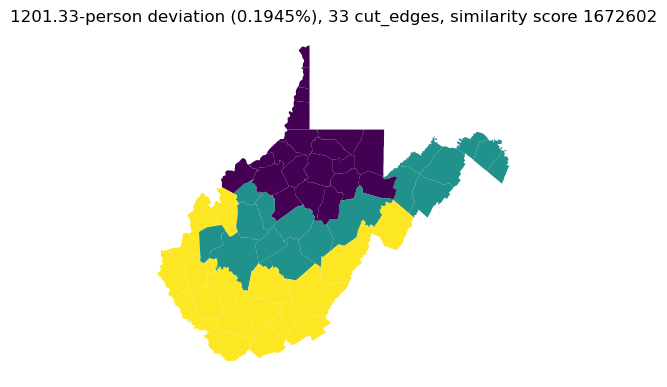

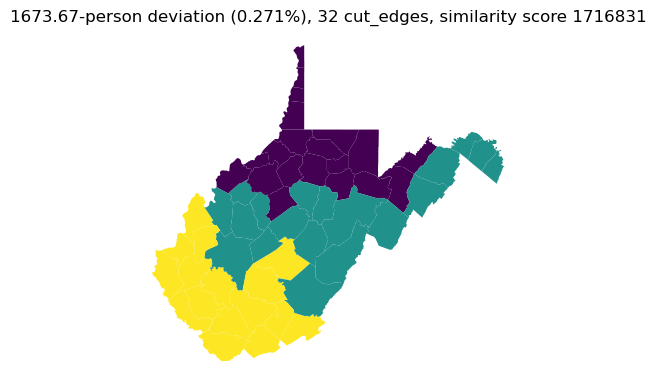

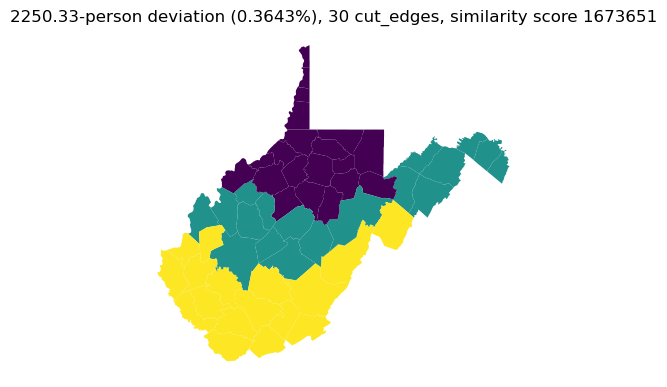

No feasible solution was found within the region: [0, 111.3]

####################################################################################################
Pareto Frontier for state WV,  objective perimeter
####################################################################################################

Pareto front plans: [[[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 48, 49], [1, 3, 9, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 26, 31, 32, 33, 35, 41, 45, 48, 49], [3, 9, 20, 21, 22, 23, 24, 27, 28, 29, 30, 37, 39, 44, 47, 50, 51, 52], [1, 7, 8, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]], [[0, 2, 3

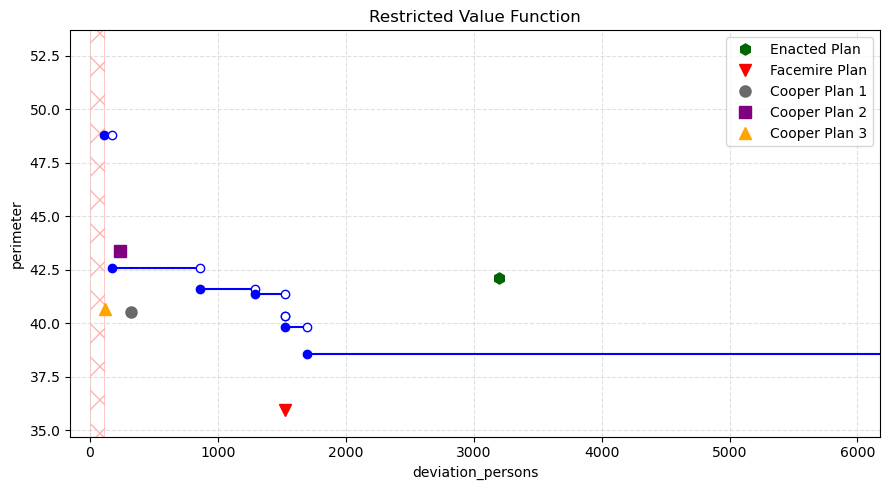

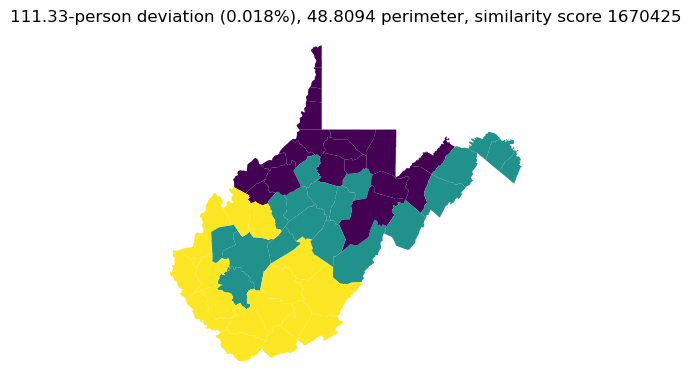

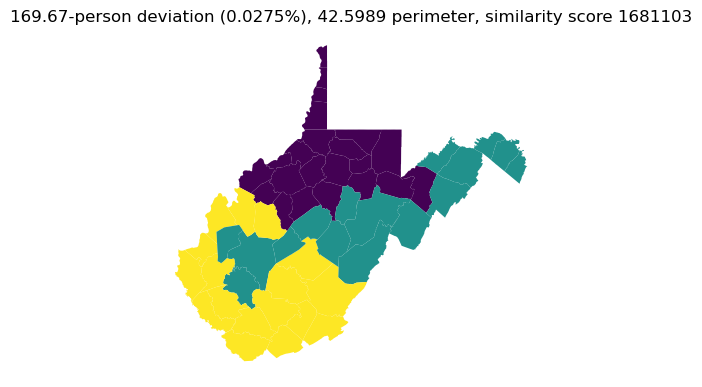

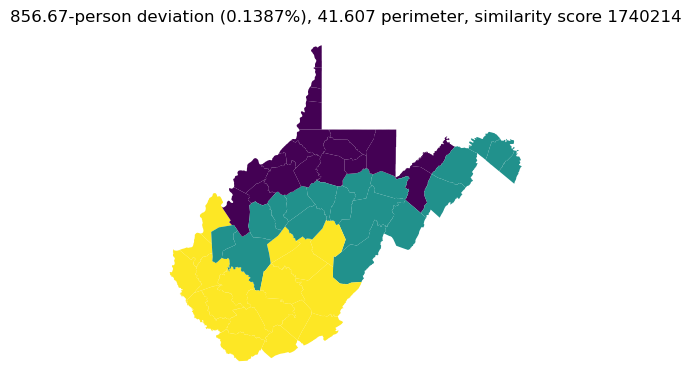

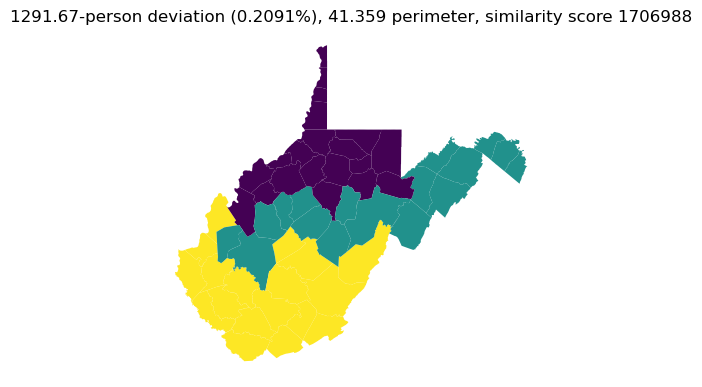

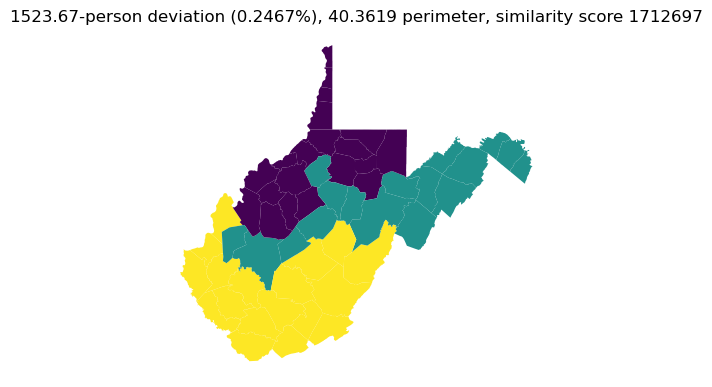

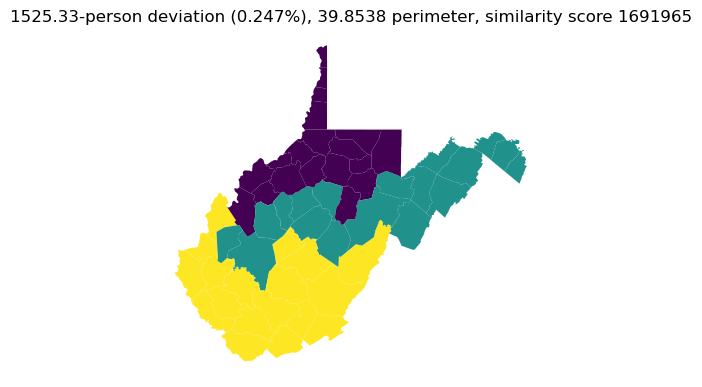

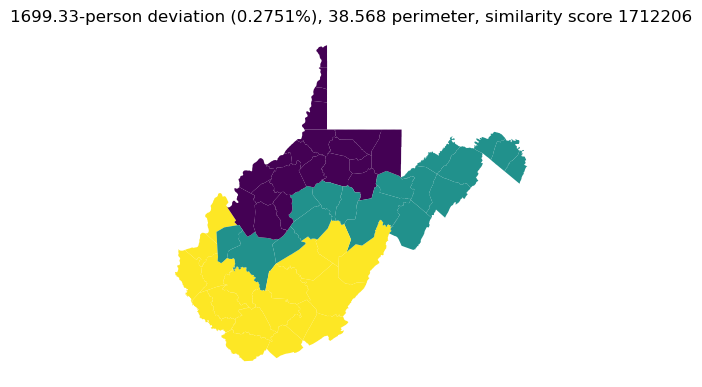

No feasible solution was found within the region: [0, 111.3]

####################################################################################################
Pareto Frontier for state WV,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 48, 49], [1, 3, 9, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 26, 31, 32, 33, 35, 41, 45, 48, 49], [3, 9, 20, 21, 22, 23, 24, 27, 28, 29, 30, 37, 39, 44, 47, 50, 51, 52], [1, 7, 8, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]

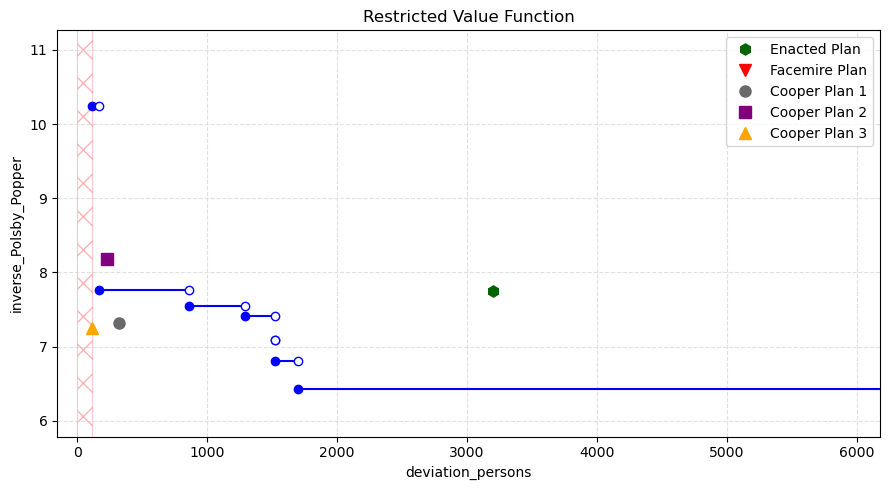

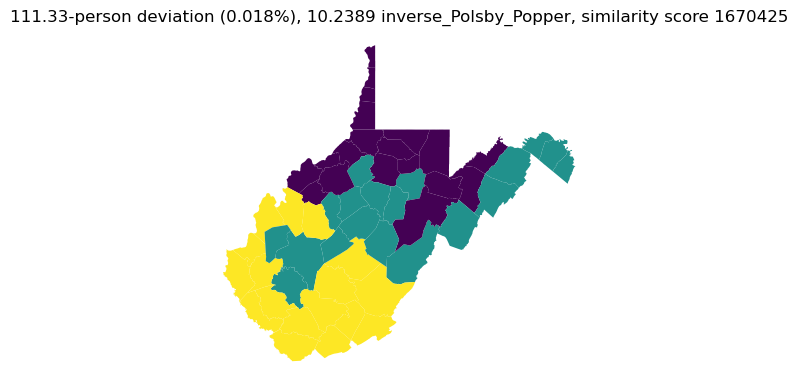

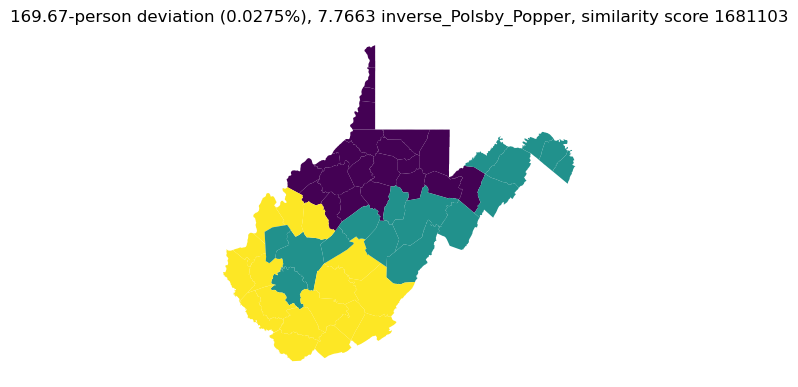

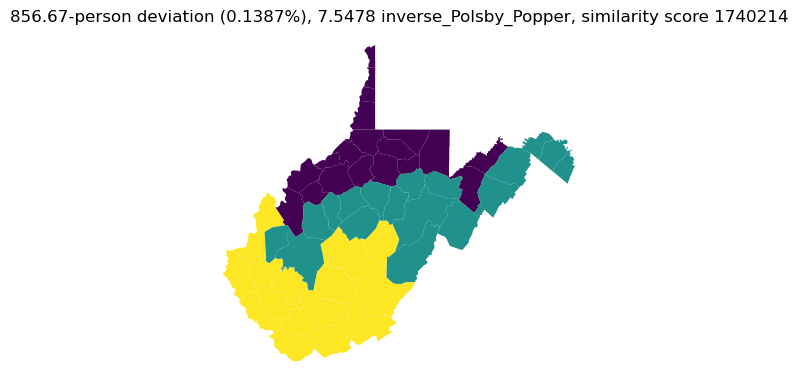

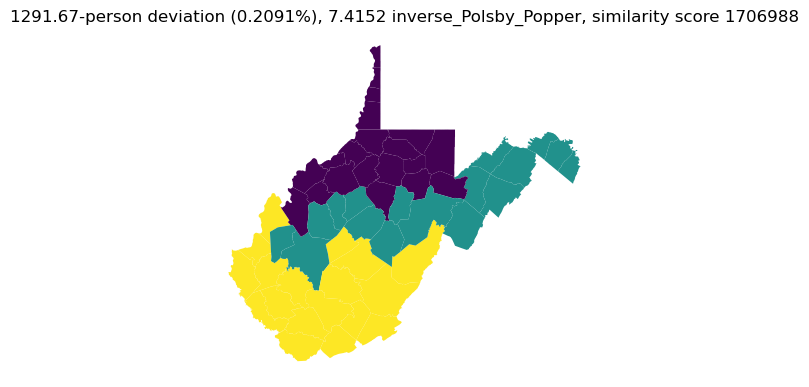

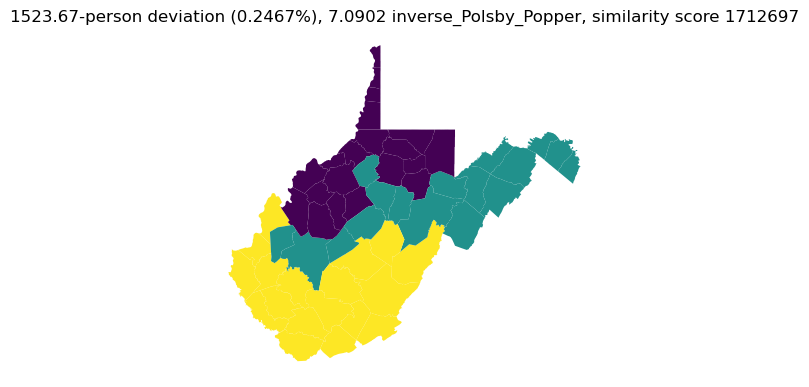

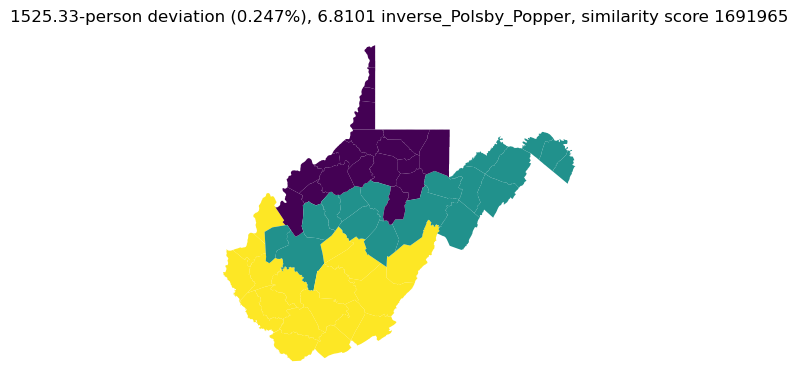

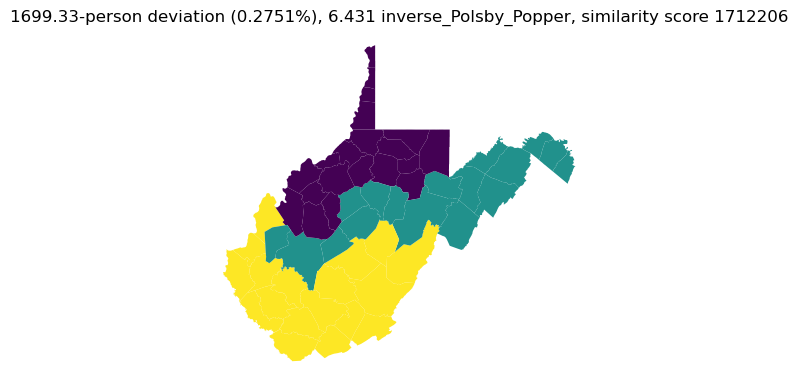

No feasible solution was found within the region: [0, 169.7]

####################################################################################################
Pareto Frontier for state WV,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 4, 5, 6, 10, 11, 16, 17, 20, 29, 31, 32, 33, 35, 41, 45, 48, 49, 50], [3, 13, 14, 18, 21, 22, 23, 24, 26, 27, 28, 30, 39, 44, 46, 51, 52], [1, 7, 8, 9, 12, 15, 19, 25, 34, 36, 37, 38, 40, 42, 43, 47, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 20, 30, 31, 32, 35, 41, 45, 48, 49, 50], [13, 14, 21, 22, 23, 24, 26, 27, 28, 29, 33, 37, 39, 44, 47, 51, 52], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]

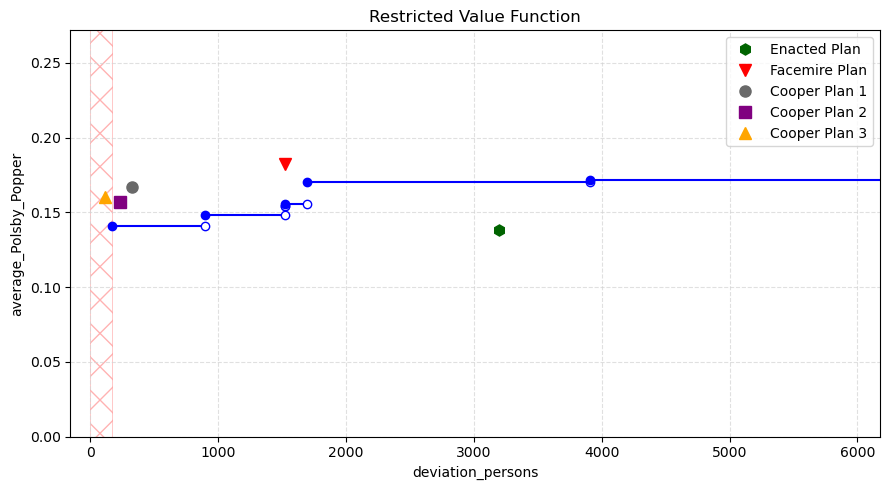

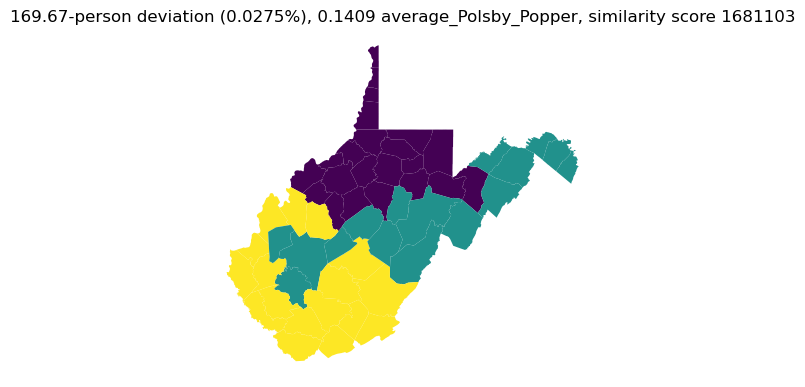

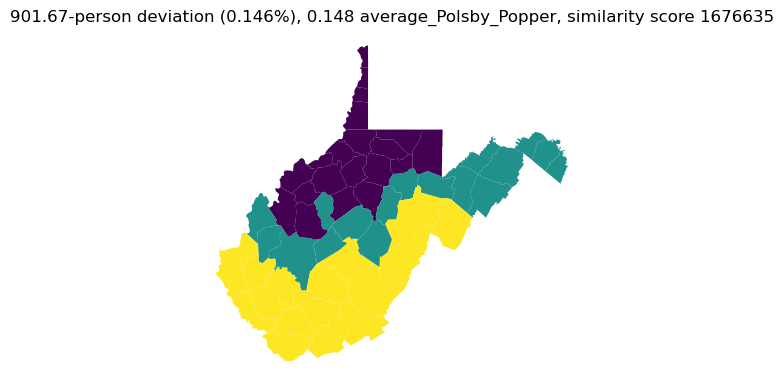

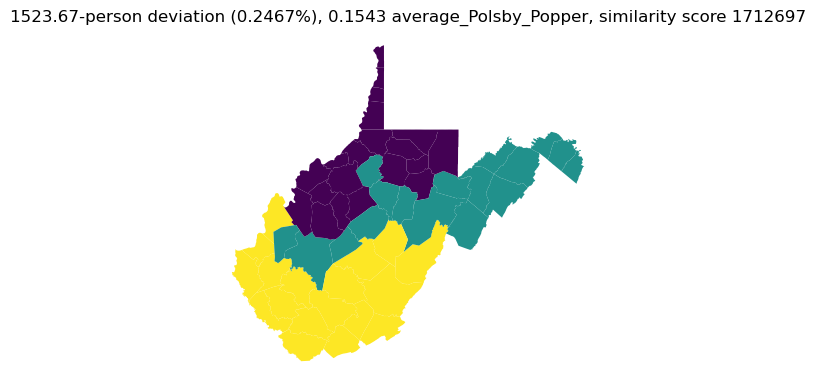

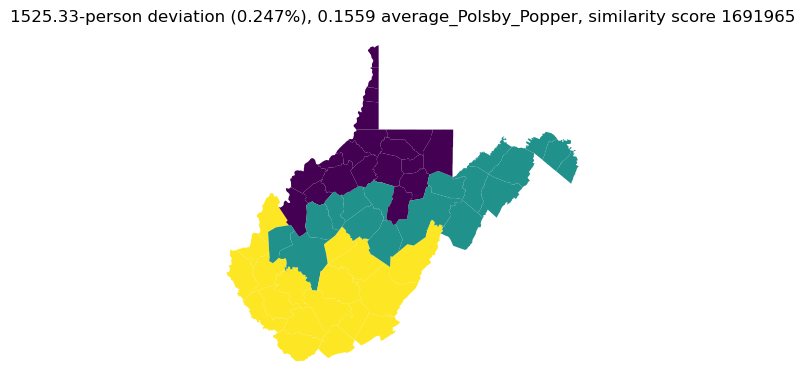

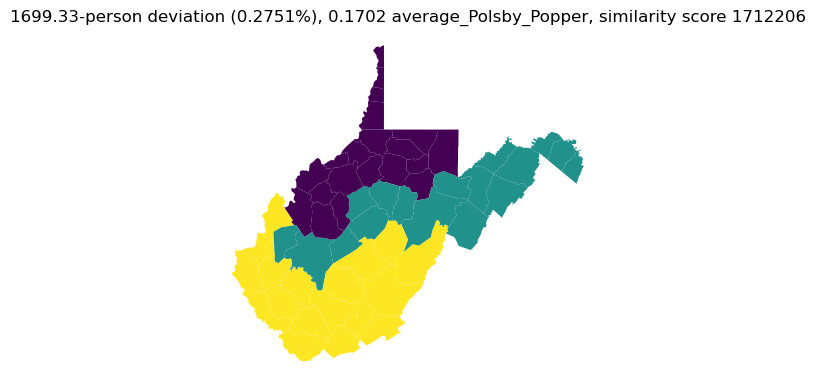

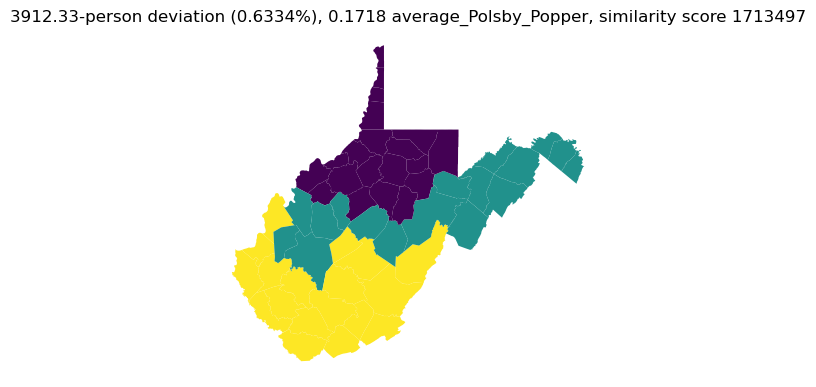

No feasible solution was found within the region: [0, 111.3]

####################################################################################################
Pareto Frontier for state WV,  objective bottleneck_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 48, 49], [1, 3, 9, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 49], [9, 12, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 50, 51, 52], [1, 6, 7, 8, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 48, 53, 

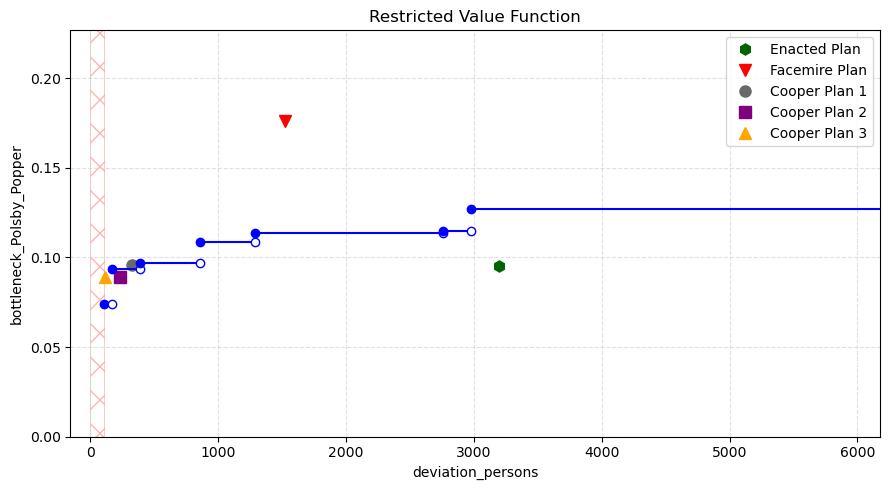

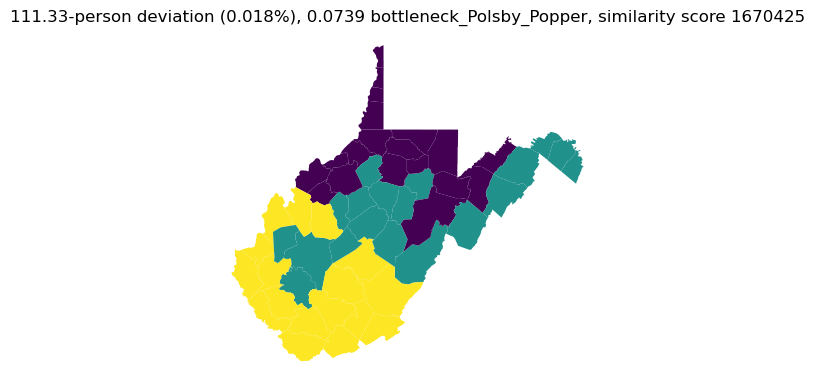

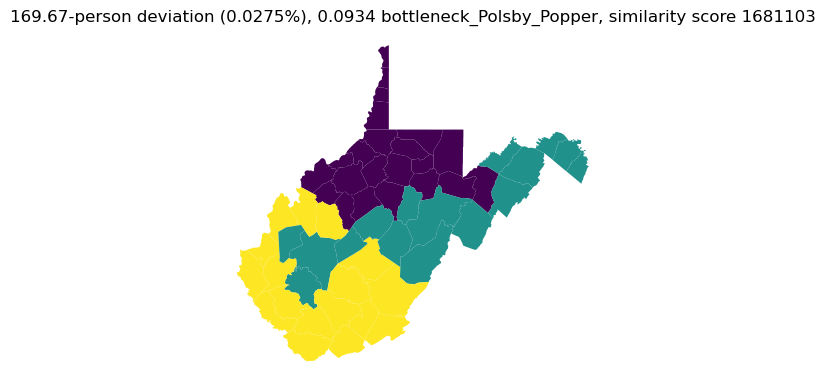

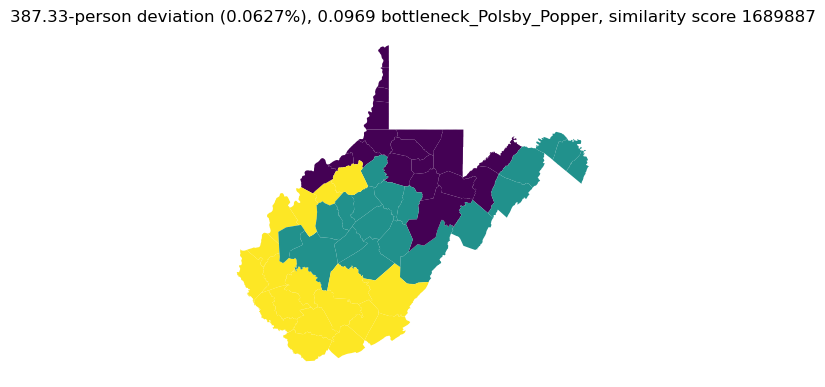

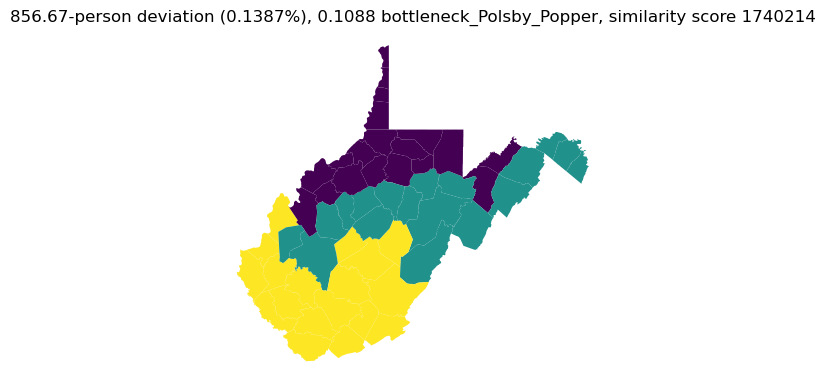

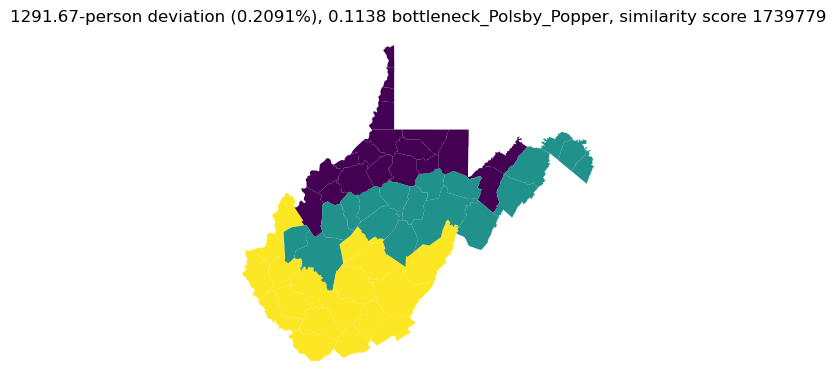

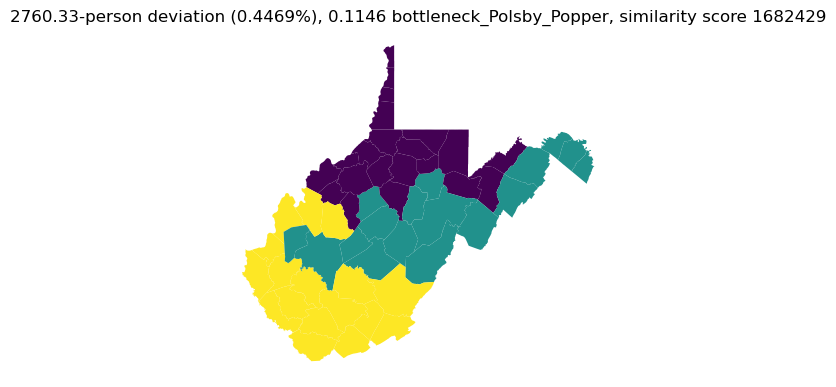

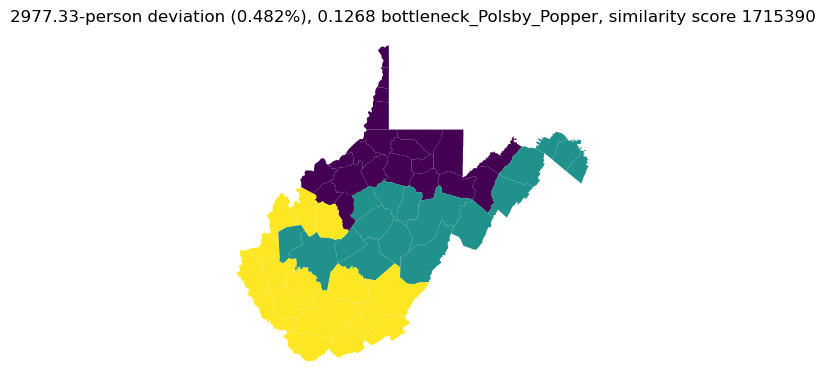

In [9]:
from pareto import plot_pareto_frontiers

epsilon = 1 / (2 * G._k)
for (state, obj_type), result in plans_dict.items():
    
    min_deviation = min(round(r[2], 1) for r in result)
    if min_deviation < epsilon:
        no_solution_region = None
    else:
        no_solution_region = [0, min_deviation]
        print(f"No feasible solution was found within the region: {no_solution_region}")
        
    plot_pareto_frontiers(
                    G,
                    method='epsilon_constraint_method',
                    plans=None,                                   #if method ='epsilon_constraint_method' is None 
                    obj_types=obj_type,                               
                    ideal_population=G._ideal_population,
                    state=state,
                    filepath=filepath,
                    filename2=filename2,
                    no_solution_region=no_solution_region,
                    year=year,
                    result=result,                               #if method ='heuristic' is None 
                    special_plans_scores=special_plans_scores,
                    similarity=[similarity_initial_districts,similarity_threshold]       
                 )

In [10]:
pp1 = [[[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 48, 49], [1, 3, 9, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 49], [9, 12, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 50, 51, 52], [1, 6, 7, 8, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 48, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 20, 24, 30, 31, 32, 33, 35, 45, 48, 49, 50, 51], [12, 13, 14, 21, 22, 23, 26, 27, 28, 29, 37, 39, 44, 46, 52], [1, 7, 8, 9, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 47, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 20, 24, 30, 31, 32, 33, 35, 45, 48, 49, 50, 51], [12, 13, 14, 18, 21, 22, 23, 26, 27, 28, 29, 37, 39, 41, 46, 52], [1, 7, 8, 9, 15, 19, 25, 34, 36, 38, 40, 42, 43, 44, 47, 53, 54]], [[0, 2, 3, 4, 5, 10, 11, 16, 17, 20, 24, 29, 31, 32, 33, 35, 45, 48, 49, 52], [6, 12, 13, 14, 21, 22, 23, 26, 27, 28, 30, 37, 39, 44, 46, 50, 51], [1, 7, 8, 9, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 47, 53, 54]], [[0, 2, 3, 4, 5, 10, 11, 13, 16, 17, 20, 24, 26, 31, 32, 33, 35, 45, 48, 49], [6, 9, 14, 21, 22, 23, 27, 28, 29, 30, 37, 39, 41, 42, 46, 47, 50, 51, 52], [1, 7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 43, 44, 53, 54]], [[0, 2, 3, 4, 5, 10, 11, 16, 17, 20, 24, 29, 31, 32, 33, 35, 45, 48, 49, 52], [6, 12, 13, 14, 18, 21, 22, 23, 26, 27, 28, 30, 37, 39, 41, 46, 50, 51], [1, 7, 8, 9, 15, 19, 25, 34, 36, 38, 40, 42, 43, 44, 47, 53, 54]]]
pp2 = [[[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 48, 49], [1, 3, 9, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 26, 31, 32, 33, 35, 41, 45, 48, 49], [3, 9, 20, 21, 22, 23, 24, 27, 28, 29, 30, 37, 39, 44, 47, 50, 51, 52], [1, 7, 8, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 24, 29, 31, 32, 33, 35, 41, 45, 48, 49], [13, 20, 21, 22, 23, 26, 27, 28, 30, 37, 39, 44, 46, 47, 50, 51, 52], [1, 7, 8, 9, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 20, 30, 31, 32, 35, 41, 45, 48, 49, 50], [13, 14, 21, 22, 23, 24, 26, 27, 28, 29, 33, 37, 39, 44, 47, 51, 52], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 31, 32, 33, 35, 41, 45, 48, 49, 52], [13, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 37, 39, 44, 46, 47, 50, 51], [1, 7, 8, 9, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 30, 31, 32, 33, 35, 41, 45, 48, 49, 50], [13, 14, 20, 21, 22, 23, 24, 26, 27, 28, 29, 37, 39, 44, 47, 51, 52], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]]]
pp3 = [[[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 48, 49], [1, 3, 9, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 26, 31, 32, 33, 35, 41, 45, 48, 49], [3, 9, 20, 21, 22, 23, 24, 27, 28, 29, 30, 37, 39, 44, 47, 50, 51, 52], [1, 7, 8, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 24, 29, 31, 32, 33, 35, 41, 45, 48, 49], [13, 20, 21, 22, 23, 26, 27, 28, 30, 37, 39, 44, 46, 47, 50, 51, 52], [1, 7, 8, 9, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 20, 30, 31, 32, 35, 41, 45, 48, 49, 50], [13, 14, 21, 22, 23, 24, 26, 27, 28, 29, 33, 37, 39, 44, 47, 51, 52], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 31, 32, 33, 35, 41, 45, 48, 49, 52], [13, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 37, 39, 44, 46, 47, 50, 51], [1, 7, 8, 9, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 30, 31, 32, 33, 35, 41, 45, 48, 49, 50], [13, 14, 20, 21, 22, 23, 24, 26, 27, 28, 29, 37, 39, 44, 47, 51, 52], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]]]
pp4 = [[[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 4, 5, 6, 10, 11, 16, 17, 20, 29, 31, 32, 33, 35, 41, 45, 48, 49, 50], [3, 13, 14, 18, 21, 22, 23, 24, 26, 27, 28, 30, 39, 44, 46, 51, 52], [1, 7, 8, 9, 12, 15, 19, 25, 34, 36, 37, 38, 40, 42, 43, 47, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 20, 30, 31, 32, 35, 41, 45, 48, 49, 50], [13, 14, 21, 22, 23, 24, 26, 27, 28, 29, 33, 37, 39, 44, 47, 51, 52], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 31, 32, 33, 35, 41, 45, 48, 49, 52], [13, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 37, 39, 44, 46, 47, 50, 51], [1, 7, 8, 9, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 30, 31, 32, 33, 35, 41, 45, 48, 49, 50], [13, 14, 20, 21, 22, 23, 24, 26, 27, 28, 29, 37, 39, 44, 47, 51, 52], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 16, 17, 20, 29, 31, 32, 33, 35, 45, 48, 49, 52], [13, 21, 22, 23, 24, 26, 27, 28, 30, 37, 39, 41, 44, 46, 47, 50, 51], [1, 7, 8, 9, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 53, 54]]]
pp5 = [[[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 48, 49], [1, 3, 9, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 20, 24, 29, 30, 31, 32, 33, 35, 45, 48, 49], [1, 9, 14, 21, 22, 23, 26, 27, 28, 37, 39, 44, 46, 47, 51, 52], [7, 8, 12, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 10, 11, 13, 16, 17, 24, 26, 31, 32, 35, 37, 45, 49], [9, 12, 14, 20, 21, 22, 23, 27, 28, 29, 30, 33, 39, 44, 46, 47, 50, 51, 52], [1, 6, 7, 8, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 48, 53, 54]], [[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 26, 31, 32, 33, 35, 41, 45, 48, 49], [3, 9, 20, 21, 22, 23, 24, 27, 28, 29, 30, 37, 39, 44, 47, 50, 51, 52], [1, 7, 8, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]], [[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 26, 31, 32, 33, 35, 41, 45, 48, 49], [3, 20, 21, 22, 23, 24, 27, 28, 29, 30, 37, 39, 44, 46, 47, 50, 51, 52], [1, 7, 8, 9, 12, 14, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 53, 54]], [[0, 2, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 29, 30, 31, 32, 33, 35, 45, 48, 49], [3, 9, 12, 14, 20, 21, 22, 23, 27, 28, 37, 39, 44, 46, 47, 51, 52], [1, 7, 8, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]], [[0, 2, 3, 4, 5, 6, 10, 11, 13, 16, 17, 24, 26, 30, 31, 32, 33, 35, 45, 48, 49], [9, 12, 14, 20, 21, 22, 23, 27, 28, 29, 37, 39, 44, 46, 47, 51, 52], [1, 7, 8, 15, 18, 19, 25, 34, 36, 38, 40, 41, 42, 43, 50, 53, 54]]]
pp = pp1 + pp2 + pp3 + pp4 + pp5
pp = { frozenset( frozenset( district ) for district in plan ) for plan in pp }
len(pp)

18

Deviation for 'Pareto-Optimal Plan': 2977.333333333372
Objective values for 'Pareto-Optimal Plan': {'cut_edges': 34, 'perimeter': 41.1803, 'inverse_Polsby_Popper': 7.1976, 'average_Polsby_Popper': 0.1396, 'bottleneck_Polsby_Popper': 0.1268}


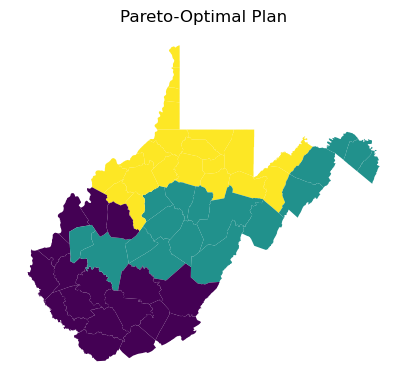

Deviation for 'Pareto-Optimal Plan': 1673.6666666666279
Objective values for 'Pareto-Optimal Plan': {'cut_edges': 32, 'perimeter': 41.9915, 'inverse_Polsby_Popper': 7.5029, 'average_Polsby_Popper': 0.1404, 'bottleneck_Polsby_Popper': 0.1024}


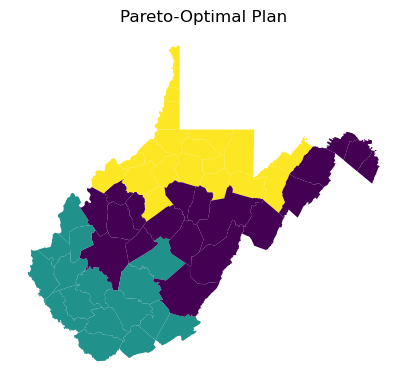

Deviation for 'Pareto-Optimal Plan': 1699.3333333333721
Objective values for 'Pareto-Optimal Plan': {'cut_edges': 34, 'perimeter': 38.568, 'inverse_Polsby_Popper': 6.431, 'average_Polsby_Popper': 0.1702, 'bottleneck_Polsby_Popper': 0.1084}


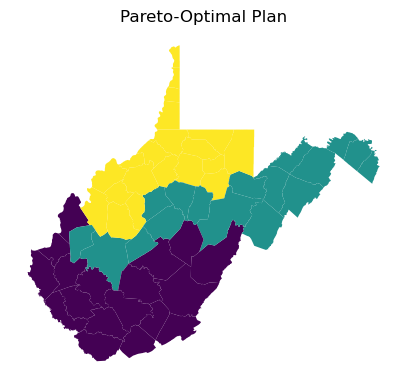

In [18]:
plans = [ [ list(district) for district in plan ] for plan in pp ]
for districts in plans:
    plan_name = 'Pareto-Optimal Plan'
    deviation = observed_deviation_persons(G_copy, districts, G_copy._ideal_population)
    
    G_copy._L = math.ceil(G_copy._ideal_population - deviation)
    G_copy._U = math.floor(G_copy._ideal_population + deviation)
    
    scores = {obj: round(compute_obj(G_copy, districts, obj), 4) for obj in objective_types}

    if deviation > 3197.34 or scores['cut_edges']>34 or scores['inverse_Polsby_Popper']>7.7477 or scores['bottleneck_Polsby_Popper']<0.0953:
        continue
    
    print(f"Deviation for '{plan_name}': {deviation}")
    print(f"Objective values for '{plan_name}': {scores}")

    draw_plan(filepath, filename2, G_copy, districts, title=plan_name, year=year)

In [19]:
total = 615991+620862+616141
print(100*1716831/total)
print(100*1712206/total)
print(100*1715390/total)

92.65173011893185
92.40213405979728
92.57396408191283
